# Imports

In [720]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from math import ceil
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.model_selection import train_test_split

In [721]:
videos_df = pd.read_csv("./data/videos.csv")
videos_df.head()

,vid,viewCount,channelId,likeCount,favoriteCount,commentCount,madeForKids,duration,publishedAt,caption,tags,thumbnails
0,hD1YtmKXNb4,40457609.0,UCX6OQ3DkcsbYNE6H8uQQuVA,2381956.0,0,102084.0,False,PT13M59S,2022-04-09T20:00:00Z,False,[],{'url': 'https://i.ytimg.com/vi/hD1YtmKXNb4/de...
1,LnlKwzc_TNA,50963596.0,UCX6OQ3DkcsbYNE6H8uQQuVA,2258114.0,0,92467.0,False,PT9M,2022-03-19T20:02:32Z,False,[],{'url': 'https://i.ytimg.com/vi/LnlKwzc_TNA/de...
2,3jS_yEK8qVI,84247720.0,UCX6OQ3DkcsbYNE6H8uQQuVA,3257710.0,0,137574.0,False,PT8M2S,2022-01-29T21:00:01Z,False,[],{'url': 'https://i.ytimg.com/vi/3jS_yEK8qVI/de...
3,00NgUctWoLQ,62739606.0,UCX6OQ3DkcsbYNE6H8uQQuVA,2985456.0,0,135606.0,False,PT12M9S,2021-12-18T21:00:00Z,True,[],{'url': 'https://i.ytimg.com/vi/00NgUctWoLQ/de...
4,x9TQ6culXIA,50799082.0,UCX6OQ3DkcsbYNE6H8uQQuVA,2682421.0,0,91080.0,False,PT12M5S,2021-12-16T21:00:00Z,True,[],{'url': 'https://i.ytimg.com/vi/x9TQ6culXIA/de...


In [722]:
channels_df = pd.read_csv("./data/channels.csv")
channels_df.head()

,channel_name,cid,videoIds,videoCount,totalViews,totalVideos,subscriberCount
0,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,"['hD1YtmKXNb4', 'LnlKwzc_TNA', '3jS_yEK8qVI', ...",87,15464704561,721,94200000
1,Bearhug,UCOqODGR-AoOTkxB74sc1Xyw,"['WykBVtROETs', 'pTO91Wz41Qg', '_5ezsJAVNG4', ...",85,945208397,421,3750000
2,GoodDayOfficial,UC8XqGKvkVgmL_MCs4irRKqw,"['kGzvNcNxC7k', 'Q5MQrclGYCE', '2xGaup5tTGM', ...",95,1323947973,2060,3440000
3,Graham Stephan,UCV6KDgJskWaEckne5aPA0aQ,"['wTgHS0WA9Ys', 'mu8Sm7UXOHo', '8RTmvUZlSSk', ...",100,371492787,768,3770000
4,spin9,UCovADuA7KBuMFORurTzL86A,"['-cFaMAb07xE', 'IzP_Fq0HR3k', 'IBLdRiPcC0Y', ...",100,127864609,698,638000


In [723]:
#rename column channelId in videos_df to be cid
df = channels_df.merge(videos_df.rename(columns={'channelId':'cid'}), on='cid')
df

,channel_name,cid,videoIds,videoCount,totalViews,totalVideos,subscriberCount,vid,viewCount,likeCount,favoriteCount,commentCount,madeForKids,duration,publishedAt,caption,tags,thumbnails
0,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,"['hD1YtmKXNb4', 'LnlKwzc_TNA', '3jS_yEK8qVI', ...",87,15464704561,721,94200000,hD1YtmKXNb4,40457609.0,2381956.0,0,102084.0,False,PT13M59S,2022-04-09T20:00:00Z,False,[],{'url': 'https://i.ytimg.com/vi/hD1YtmKXNb4/de...
1,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,"['hD1YtmKXNb4', 'LnlKwzc_TNA', '3jS_yEK8qVI', ...",87,15464704561,721,94200000,LnlKwzc_TNA,50963596.0,2258114.0,0,92467.0,False,PT9M,2022-03-19T20:02:32Z,False,[],{'url': 'https://i.ytimg.com/vi/LnlKwzc_TNA/de...
2,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,"['hD1YtmKXNb4', 'LnlKwzc_TNA', '3jS_yEK8qVI', ...",87,15464704561,721,94200000,3jS_yEK8qVI,84247720.0,3257710.0,0,137574.0,False,PT8M2S,2022-01-29T21:00:01Z,False,[],{'url': 'https://i.ytimg.com/vi/3jS_yEK8qVI/de...
3,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,"['hD1YtmKXNb4', 'LnlKwzc_TNA', '3jS_yEK8qVI', ...",87,15464704561,721,94200000,00NgUctWoLQ,62739606.0,2985456.0,0,135606.0,False,PT12M9S,2021-12-18T21:00:00Z,True,[],{'url': 'https://i.ytimg.com/vi/00NgUctWoLQ/de...
4,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,"['hD1YtmKXNb4', 'LnlKwzc_TNA', '3jS_yEK8qVI', ...",87,15464704561,721,94200000,x9TQ6culXIA,50799082.0,2682421.0,0,91080.0,False,PT12M5S,2021-12-16T21:00:00Z,True,[],{'url': 'https://i.ytimg.com/vi/x9TQ6culXIA/de...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,Hannah Elise,UCT9y7nOBdqfWuaZJ_x9mPkA,"['ijQjEXEjhxs', 'Wzw6Nzg5RzY', 'Yt3ynQpARMk', ...",100,56992007,211,737000,LQXFYU8-11A,346903.0,16233.0,0,715.0,False,PT18M50S,2020-06-14T19:00:04Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/LQXFYU8-11A/de...
2362,Hannah Elise,UCT9y7nOBdqfWuaZJ_x9mPkA,"['ijQjEXEjhxs', 'Wzw6Nzg5RzY', 'Yt3ynQpARMk', ...",100,56992007,211,737000,rQfqcyZl3NE,83106.0,8450.0,0,492.0,False,PT19M25S,2020-06-05T19:20:26Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/rQfqcyZl3NE/de...
2363,Hannah Elise,UCT9y7nOBdqfWuaZJ_x9mPkA,"['ijQjEXEjhxs', 'Wzw6Nzg5RzY', 'Yt3ynQpARMk', ...",100,56992007,211,737000,Dm-EDR-pGiw,823889.0,27786.0,0,1374.0,False,PT37M38S,2020-06-01T01:34:26Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/Dm-EDR-pGiw/de...
2364,Hannah Elise,UCT9y7nOBdqfWuaZJ_x9mPkA,"['ijQjEXEjhxs', 'Wzw6Nzg5RzY', 'Yt3ynQpARMk', ...",100,56992007,211,737000,hdP4j8sTkvc,395595.0,16343.0,0,693.0,False,PT18M25S,2020-05-17T19:00:07Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/hdP4j8sTkvc/de...


In [724]:
df = df.drop(columns=["videoCount", "videoIds", "cid", "vid", "channel_name"])
df

,totalViews,totalVideos,subscriberCount,viewCount,likeCount,favoriteCount,commentCount,madeForKids,duration,publishedAt,caption,tags,thumbnails
0,15464704561,721,94200000,40457609.0,2381956.0,0,102084.0,False,PT13M59S,2022-04-09T20:00:00Z,False,[],{'url': 'https://i.ytimg.com/vi/hD1YtmKXNb4/de...
1,15464704561,721,94200000,50963596.0,2258114.0,0,92467.0,False,PT9M,2022-03-19T20:02:32Z,False,[],{'url': 'https://i.ytimg.com/vi/LnlKwzc_TNA/de...
2,15464704561,721,94200000,84247720.0,3257710.0,0,137574.0,False,PT8M2S,2022-01-29T21:00:01Z,False,[],{'url': 'https://i.ytimg.com/vi/3jS_yEK8qVI/de...
3,15464704561,721,94200000,62739606.0,2985456.0,0,135606.0,False,PT12M9S,2021-12-18T21:00:00Z,True,[],{'url': 'https://i.ytimg.com/vi/00NgUctWoLQ/de...
4,15464704561,721,94200000,50799082.0,2682421.0,0,91080.0,False,PT12M5S,2021-12-16T21:00:00Z,True,[],{'url': 'https://i.ytimg.com/vi/x9TQ6culXIA/de...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,56992007,211,737000,346903.0,16233.0,0,715.0,False,PT18M50S,2020-06-14T19:00:04Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/LQXFYU8-11A/de...
2362,56992007,211,737000,83106.0,8450.0,0,492.0,False,PT19M25S,2020-06-05T19:20:26Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/rQfqcyZl3NE/de...
2363,56992007,211,737000,823889.0,27786.0,0,1374.0,False,PT37M38S,2020-06-01T01:34:26Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/Dm-EDR-pGiw/de...
2364,56992007,211,737000,395595.0,16343.0,0,693.0,False,PT18M25S,2020-05-17T19:00:07Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/hdP4j8sTkvc/de...


In [725]:
#convert empty list to nan
df["tags"] = df["tags"].replace({
    "[]": None,
    np.nan: None
})
df["tags"]

0                                                    None
1                                                    None
2                                                    None
3                                                    None
4                                                    None
                              ...                        
2361    ['Hannah elise', 'hannah', 'Hannah maute', 'vl...
2362    ['Hannah elise', 'hannah', 'Hannah maute', 'vl...
2363    ['Hannah elise', 'hannah', 'Hannah maute', 'vl...
2364    ['Hannah elise', 'hannah', 'Hannah maute', 'vl...
2365    ['Hannah elise', 'hannah', 'Hannah maute', 'vl...
Name: tags, Length: 2366, dtype: object

## Visualization

### Caption

False    1357
True     1009
Name: caption, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='caption', ylabel='count'>

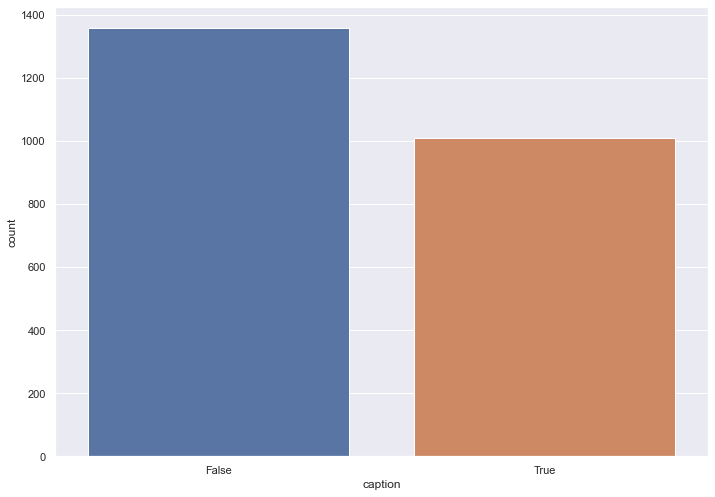

In [726]:
print(df["caption"].value_counts())
sns.countplot(df["caption"])

### Made for kids

False    2366
Name: madeForKids, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='madeForKids', ylabel='count'>

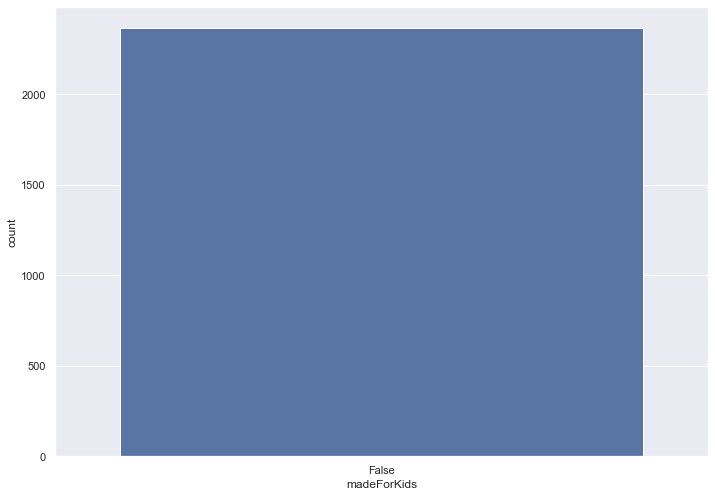

In [727]:
print(df["madeForKids"].value_counts())
sns.countplot(df["madeForKids"])

All of the videos fetched are not tagged as made for kids

### Favorite count

0    2366
Name: favoriteCount, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='favoriteCount', ylabel='count'>

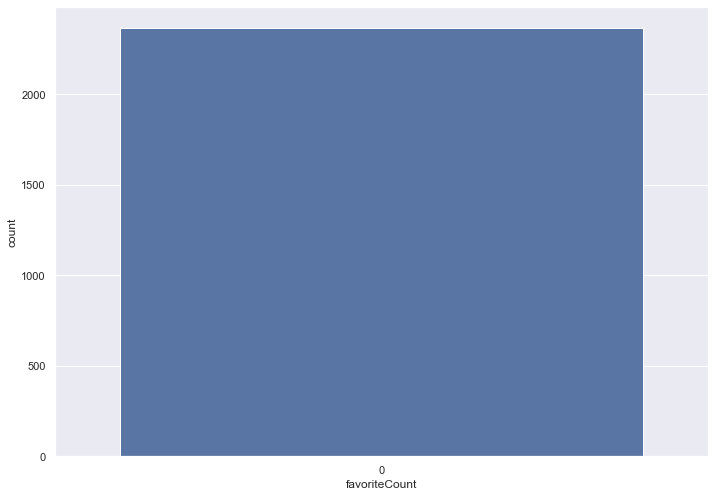

In [728]:
print(df["favoriteCount"].value_counts())
sns.countplot(df["favoriteCount"])

All of the videos fetched are not favorited

### Total Videos

<AxesSubplot:xlabel='totalVideos', ylabel='Count'>

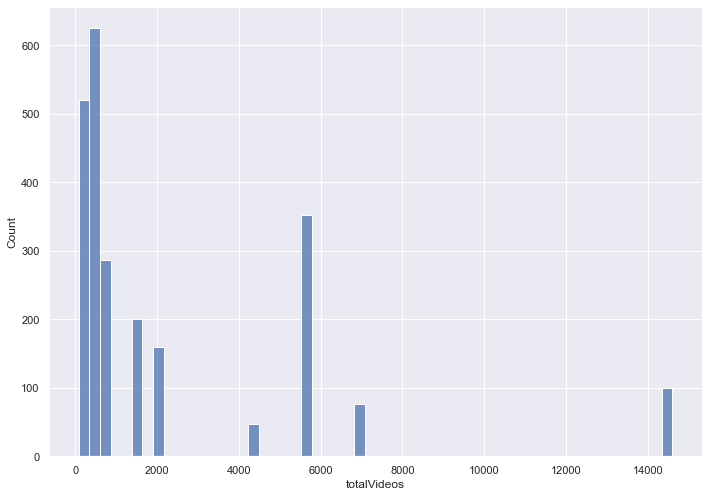

In [729]:
sns.histplot(df["totalVideos"])

### Total Views

<AxesSubplot:xlabel='totalViews', ylabel='Count'>

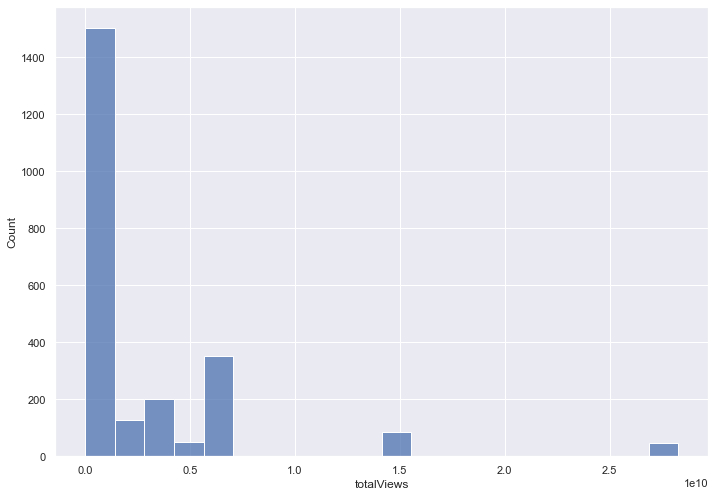

In [730]:
sns.histplot(df["totalViews"], bins=20)

### Subscriber Count

<AxesSubplot:xlabel='subscriberCount', ylabel='Count'>

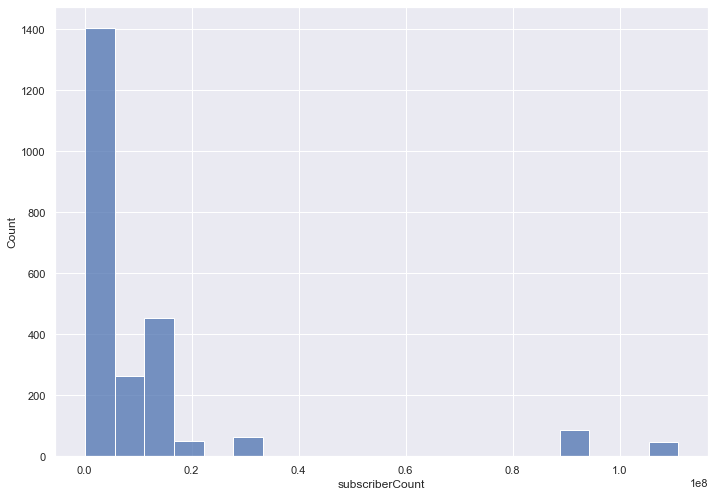

In [731]:
sns.histplot(df["subscriberCount"], bins=20)

# Preprocessing

## Extract minute from duration

In [732]:
#Extract minute from df["duration"] with regex of format PT(X)M
df["minute"] = df["duration"].str.extract(r"PT(\d+)?M?(\d+)?S?")[0]
df

,totalViews,totalVideos,subscriberCount,viewCount,likeCount,favoriteCount,commentCount,madeForKids,duration,publishedAt,caption,tags,thumbnails,minute
0,15464704561,721,94200000,40457609.0,2381956.0,0,102084.0,False,PT13M59S,2022-04-09T20:00:00Z,False,None,{'url': 'https://i.ytimg.com/vi/hD1YtmKXNb4/de...,13
1,15464704561,721,94200000,50963596.0,2258114.0,0,92467.0,False,PT9M,2022-03-19T20:02:32Z,False,None,{'url': 'https://i.ytimg.com/vi/LnlKwzc_TNA/de...,9
2,15464704561,721,94200000,84247720.0,3257710.0,0,137574.0,False,PT8M2S,2022-01-29T21:00:01Z,False,None,{'url': 'https://i.ytimg.com/vi/3jS_yEK8qVI/de...,8
3,15464704561,721,94200000,62739606.0,2985456.0,0,135606.0,False,PT12M9S,2021-12-18T21:00:00Z,True,None,{'url': 'https://i.ytimg.com/vi/00NgUctWoLQ/de...,12
4,15464704561,721,94200000,50799082.0,2682421.0,0,91080.0,False,PT12M5S,2021-12-16T21:00:00Z,True,None,{'url': 'https://i.ytimg.com/vi/x9TQ6culXIA/de...,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,56992007,211,737000,346903.0,16233.0,0,715.0,False,PT18M50S,2020-06-14T19:00:04Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/LQXFYU8-11A/de...,18
2362,56992007,211,737000,83106.0,8450.0,0,492.0,False,PT19M25S,2020-06-05T19:20:26Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/rQfqcyZl3NE/de...,19
2363,56992007,211,737000,823889.0,27786.0,0,1374.0,False,PT37M38S,2020-06-01T01:34:26Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/Dm-EDR-pGiw/de...,37
2364,56992007,211,737000,395595.0,16343.0,0,693.0,False,PT18M25S,2020-05-17T19:00:07Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/hdP4j8sTkvc/de...,18


In [733]:
df = df.drop(columns=["duration"])
df

,totalViews,totalVideos,subscriberCount,viewCount,likeCount,favoriteCount,commentCount,madeForKids,publishedAt,caption,tags,thumbnails,minute
0,15464704561,721,94200000,40457609.0,2381956.0,0,102084.0,False,2022-04-09T20:00:00Z,False,None,{'url': 'https://i.ytimg.com/vi/hD1YtmKXNb4/de...,13
1,15464704561,721,94200000,50963596.0,2258114.0,0,92467.0,False,2022-03-19T20:02:32Z,False,None,{'url': 'https://i.ytimg.com/vi/LnlKwzc_TNA/de...,9
2,15464704561,721,94200000,84247720.0,3257710.0,0,137574.0,False,2022-01-29T21:00:01Z,False,None,{'url': 'https://i.ytimg.com/vi/3jS_yEK8qVI/de...,8
3,15464704561,721,94200000,62739606.0,2985456.0,0,135606.0,False,2021-12-18T21:00:00Z,True,None,{'url': 'https://i.ytimg.com/vi/00NgUctWoLQ/de...,12
4,15464704561,721,94200000,50799082.0,2682421.0,0,91080.0,False,2021-12-16T21:00:00Z,True,None,{'url': 'https://i.ytimg.com/vi/x9TQ6culXIA/de...,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,56992007,211,737000,346903.0,16233.0,0,715.0,False,2020-06-14T19:00:04Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/LQXFYU8-11A/de...,18
2362,56992007,211,737000,83106.0,8450.0,0,492.0,False,2020-06-05T19:20:26Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/rQfqcyZl3NE/de...,19
2363,56992007,211,737000,823889.0,27786.0,0,1374.0,False,2020-06-01T01:34:26Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/Dm-EDR-pGiw/de...,37
2364,56992007,211,737000,395595.0,16343.0,0,693.0,False,2020-05-17T19:00:07Z,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/hdP4j8sTkvc/de...,18


In [734]:
df["minute"] = df["minute"].astype(int).apply(lambda x: round(x/5)*5)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minute', ylabel='count'>

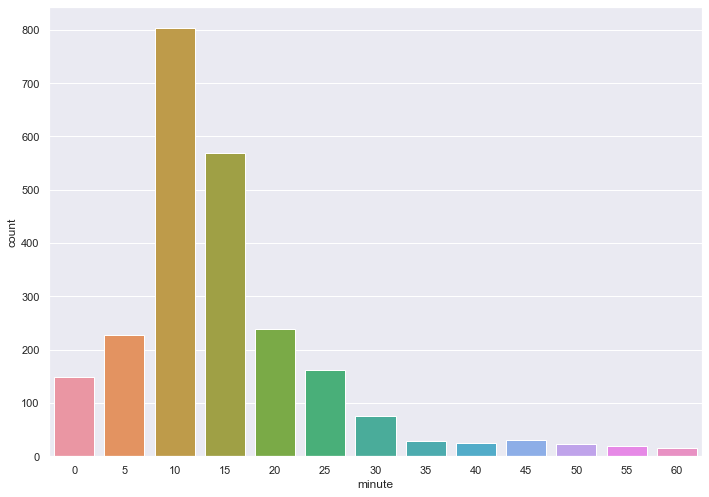

In [735]:
sns.countplot(df["minute"].astype(int))

## Impute missing values

In [736]:
df = df.fillna(df.median())
df.isna().sum()

totalViews           0
totalVideos          0
subscriberCount      0
viewCount            0
likeCount            0
favoriteCount        0
commentCount         0
madeForKids          0
publishedAt          0
caption              0
tags               416
thumbnails           0
minute               0
dtype: int64

## Drop unncecessary columns

In [737]:
df = df.drop(columns=["favoriteCount", "madeForKids", "publishedAt"])
df

,totalViews,totalVideos,subscriberCount,viewCount,likeCount,commentCount,caption,tags,thumbnails,minute
0,15464704561,721,94200000,40457609.0,2381956.0,102084.0,False,None,{'url': 'https://i.ytimg.com/vi/hD1YtmKXNb4/de...,15
1,15464704561,721,94200000,50963596.0,2258114.0,92467.0,False,None,{'url': 'https://i.ytimg.com/vi/LnlKwzc_TNA/de...,10
2,15464704561,721,94200000,84247720.0,3257710.0,137574.0,False,None,{'url': 'https://i.ytimg.com/vi/3jS_yEK8qVI/de...,10
3,15464704561,721,94200000,62739606.0,2985456.0,135606.0,True,None,{'url': 'https://i.ytimg.com/vi/00NgUctWoLQ/de...,10
4,15464704561,721,94200000,50799082.0,2682421.0,91080.0,True,None,{'url': 'https://i.ytimg.com/vi/x9TQ6culXIA/de...,10
...,...,...,...,...,...,...,...,...,...,...
2361,56992007,211,737000,346903.0,16233.0,715.0,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/LQXFYU8-11A/de...,20
2362,56992007,211,737000,83106.0,8450.0,492.0,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/rQfqcyZl3NE/de...,20
2363,56992007,211,737000,823889.0,27786.0,1374.0,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/Dm-EDR-pGiw/de...,35
2364,56992007,211,737000,395595.0,16343.0,693.0,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",{'url': 'https://i.ytimg.com/vi/hdP4j8sTkvc/de...,20


In [738]:
df["thumbnails"] = df["thumbnails"].apply(lambda thumbnail: ast.literal_eval(thumbnail)["url"])
df

,totalViews,totalVideos,subscriberCount,viewCount,likeCount,commentCount,caption,tags,thumbnails,minute
0,15464704561,721,94200000,40457609.0,2381956.0,102084.0,False,None,https://i.ytimg.com/vi/hD1YtmKXNb4/default.jpg,15
1,15464704561,721,94200000,50963596.0,2258114.0,92467.0,False,None,https://i.ytimg.com/vi/LnlKwzc_TNA/default.jpg,10
2,15464704561,721,94200000,84247720.0,3257710.0,137574.0,False,None,https://i.ytimg.com/vi/3jS_yEK8qVI/default.jpg,10
3,15464704561,721,94200000,62739606.0,2985456.0,135606.0,True,None,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,10
4,15464704561,721,94200000,50799082.0,2682421.0,91080.0,True,None,https://i.ytimg.com/vi/x9TQ6culXIA/default.jpg,10
...,...,...,...,...,...,...,...,...,...,...
2361,56992007,211,737000,346903.0,16233.0,715.0,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/LQXFYU8-11A/default.jpg,20
2362,56992007,211,737000,83106.0,8450.0,492.0,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/rQfqcyZl3NE/default.jpg,20
2363,56992007,211,737000,823889.0,27786.0,1374.0,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/Dm-EDR-pGiw/default.jpg,35
2364,56992007,211,737000,395595.0,16343.0,693.0,False,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/hdP4j8sTkvc/default.jpg,20


In [739]:
df["caption"] = df["caption"].astype(int)
df

,totalViews,totalVideos,subscriberCount,viewCount,likeCount,commentCount,caption,tags,thumbnails,minute
0,15464704561,721,94200000,40457609.0,2381956.0,102084.0,0,None,https://i.ytimg.com/vi/hD1YtmKXNb4/default.jpg,15
1,15464704561,721,94200000,50963596.0,2258114.0,92467.0,0,None,https://i.ytimg.com/vi/LnlKwzc_TNA/default.jpg,10
2,15464704561,721,94200000,84247720.0,3257710.0,137574.0,0,None,https://i.ytimg.com/vi/3jS_yEK8qVI/default.jpg,10
3,15464704561,721,94200000,62739606.0,2985456.0,135606.0,1,None,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,10
4,15464704561,721,94200000,50799082.0,2682421.0,91080.0,1,None,https://i.ytimg.com/vi/x9TQ6culXIA/default.jpg,10
...,...,...,...,...,...,...,...,...,...,...
2361,56992007,211,737000,346903.0,16233.0,715.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/LQXFYU8-11A/default.jpg,20
2362,56992007,211,737000,83106.0,8450.0,492.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/rQfqcyZl3NE/default.jpg,20
2363,56992007,211,737000,823889.0,27786.0,1374.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/Dm-EDR-pGiw/default.jpg,35
2364,56992007,211,737000,395595.0,16343.0,693.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/hdP4j8sTkvc/default.jpg,20


df for linear regression

In [740]:
df_lr = df.drop(columns=["tags","thumbnails"])
df_lr

,totalViews,totalVideos,subscriberCount,viewCount,likeCount,commentCount,caption,minute
0,15464704561,721,94200000,40457609.0,2381956.0,102084.0,0,15
1,15464704561,721,94200000,50963596.0,2258114.0,92467.0,0,10
2,15464704561,721,94200000,84247720.0,3257710.0,137574.0,0,10
3,15464704561,721,94200000,62739606.0,2985456.0,135606.0,1,10
4,15464704561,721,94200000,50799082.0,2682421.0,91080.0,1,10
...,...,...,...,...,...,...,...,...
2361,56992007,211,737000,346903.0,16233.0,715.0,0,20
2362,56992007,211,737000,83106.0,8450.0,492.0,0,20
2363,56992007,211,737000,823889.0,27786.0,1374.0,0,35
2364,56992007,211,737000,395595.0,16343.0,693.0,0,20


## Separate X and y

In [741]:
X = df.drop(columns=["viewCount"])
y = df["viewCount"]

Linear regression

In [742]:
X_lr = df_lr.drop(columns=["viewCount"])
y_lr = df_lr["viewCount"]

## Remove auto-correlation

<AxesSubplot:>

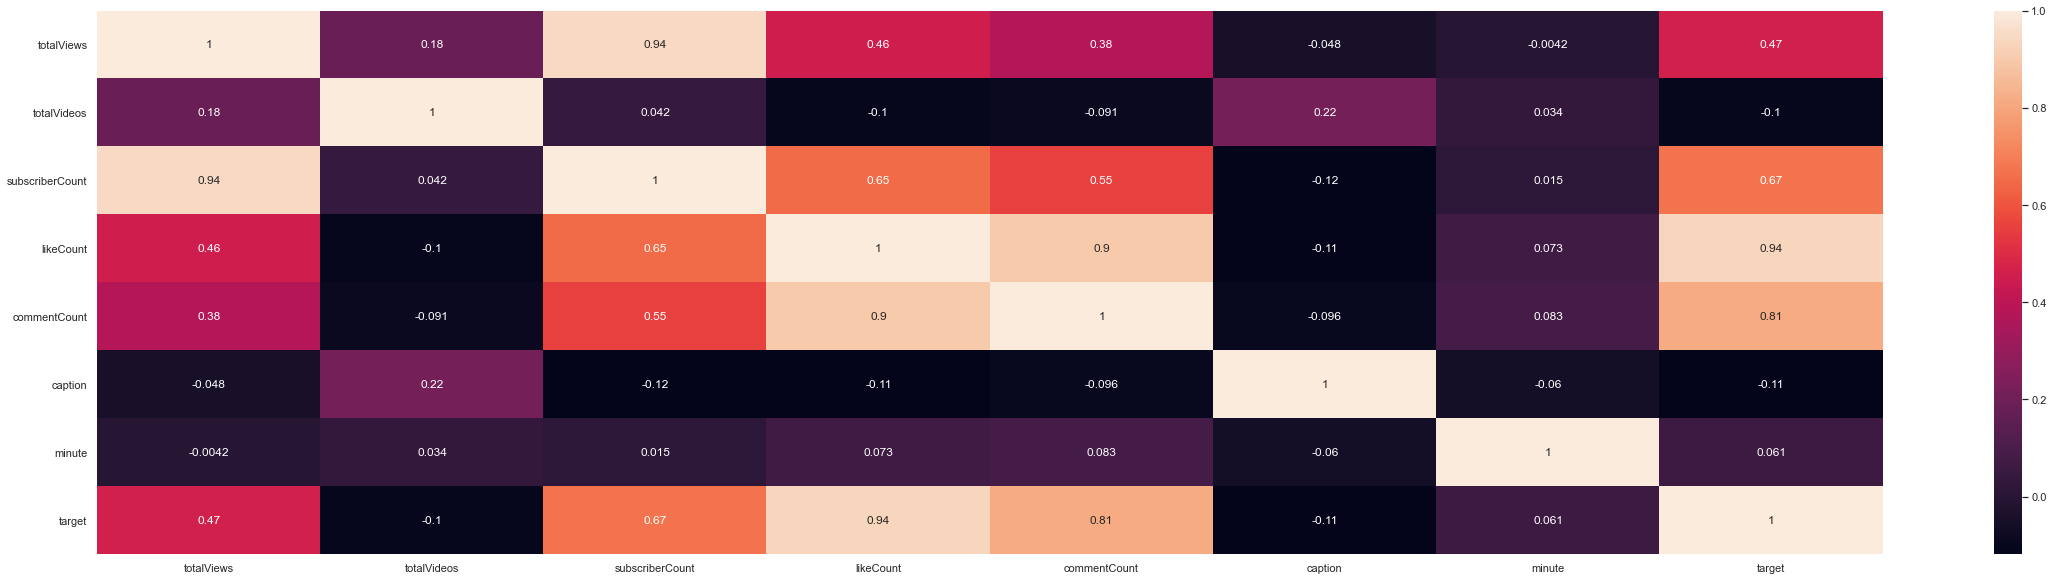

In [743]:
plt.figure(figsize=(40,10))
heatmap = X.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

likeCount and commentCount are highly correlated (0.9)
subscriberCount and totalViews are highly correlated (0.94)

In [744]:
to_drop = ["commentCount", "subscriberCount"]
X = X.drop(columns=to_drop)
X_lr = X_lr.drop(columns=to_drop)
X

,totalViews,totalVideos,likeCount,caption,tags,thumbnails,minute
0,15464704561,721,2381956.0,0,None,https://i.ytimg.com/vi/hD1YtmKXNb4/default.jpg,15
1,15464704561,721,2258114.0,0,None,https://i.ytimg.com/vi/LnlKwzc_TNA/default.jpg,10
2,15464704561,721,3257710.0,0,None,https://i.ytimg.com/vi/3jS_yEK8qVI/default.jpg,10
3,15464704561,721,2985456.0,1,None,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,10
4,15464704561,721,2682421.0,1,None,https://i.ytimg.com/vi/x9TQ6culXIA/default.jpg,10
...,...,...,...,...,...,...,...
2361,56992007,211,16233.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/LQXFYU8-11A/default.jpg,20
2362,56992007,211,8450.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/rQfqcyZl3NE/default.jpg,20
2363,56992007,211,27786.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/Dm-EDR-pGiw/default.jpg,35
2364,56992007,211,16343.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/hdP4j8sTkvc/default.jpg,20


<AxesSubplot:>

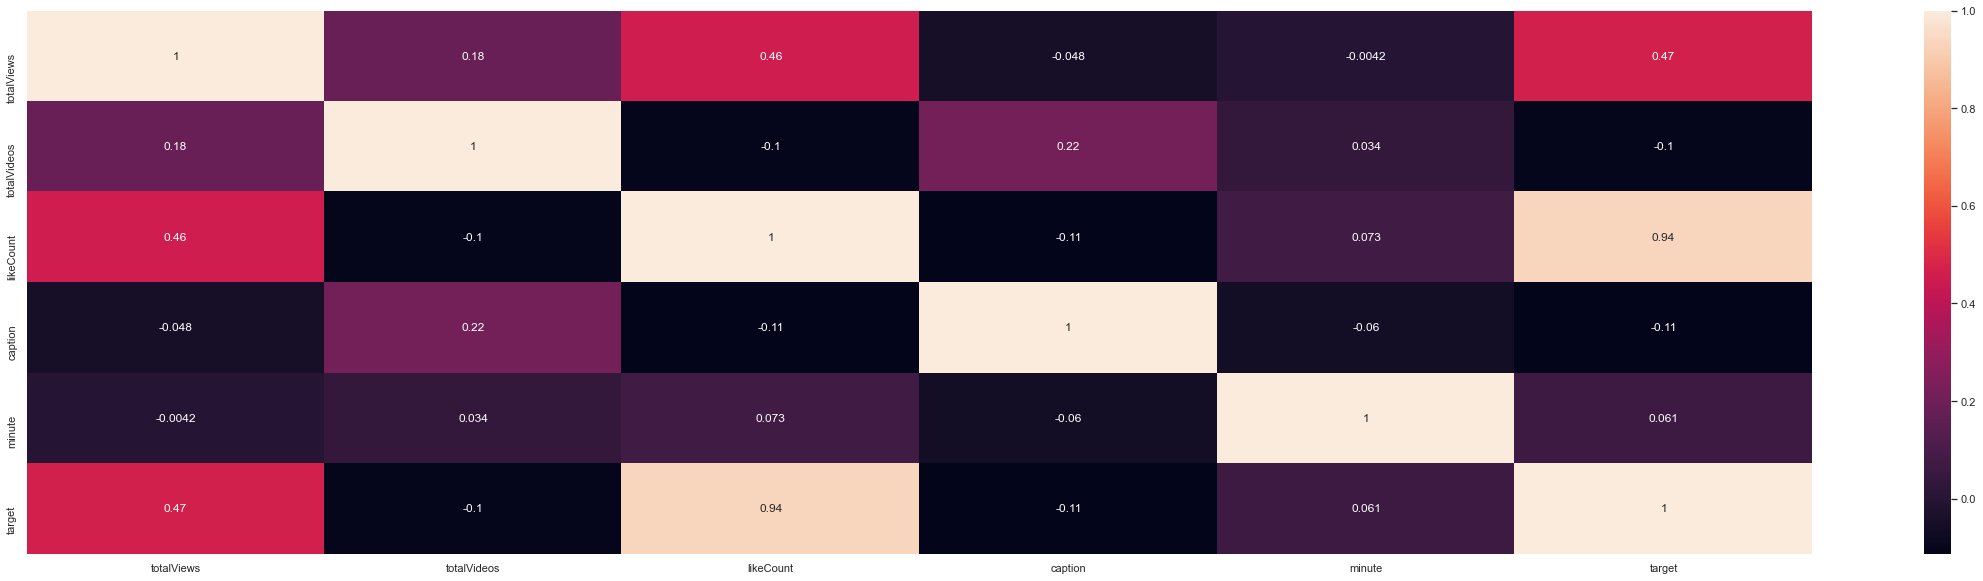

In [745]:
plt.figure(figsize=(40,10))
heatmap = X.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

## Split Train Test

In [746]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train

,totalViews,totalVideos,likeCount,caption,tags,thumbnails,minute
1871,5713674070,5726,55559.0,1,"['apple', 'macos', 'gaming', 'gaming laptop', ...",https://i.ytimg.com/vi/r5NMIl2iqJ8/default.jpg,10
2281,56992007,211,11255.0,0,"['Hannah elise', 'hannah', 'Hannah maute', 'vl...",https://i.ytimg.com/vi/1_wgGJZiSjY/default.jpg,10
1193,20257176,225,696.0,0,None,https://i.ytimg.com/vi/iVwRJDu1Pho/default.jpg,0
719,428196106,359,27942.0,1,None,https://i.ytimg.com/vi/peeRWHI7FpY/default.jpg,20
482,1071067076,14601,3947.0,0,"['CNBC', 'business', 'news', 'finance stock', ...",https://i.ytimg.com/vi/TtjhHYi95rQ/default.jpg,10
...,...,...,...,...,...,...,...
1638,2694437694,2101,24830.0,0,"['heartrocker', 'hrk', 'พี่เอก', 'เอก', 'ฮรก',...",https://i.ytimg.com/vi/geMidoZNLGw/default.jpg,50
1095,2964744703,1432,128067.0,1,"['AirPods 3', 'AirPods', 'AirPods review', 'Ai...",https://i.ytimg.com/vi/LcI6F_GPwfE/default.jpg,10
1130,2964744703,1432,170917.0,0,"['Beats by Dre', 'what happened to beats by Dr...",https://i.ytimg.com/vi/ILHEYblJ7uM/default.jpg,15
1294,2869135393,1387,1876.0,1,"['vox.com', 'vox', 'explain']",https://i.ytimg.com/vi/uq8tKXhvanc/default.jpg,5


Linear regression

In [747]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr,y_lr, test_size=0.2, random_state=42)
X_train_lr

,totalViews,totalVideos,likeCount,caption,minute
1871,5713674070,5726,55559.0,1,10
2281,56992007,211,11255.0,0,10
1193,20257176,225,696.0,0,0
719,428196106,359,27942.0,1,20
482,1071067076,14601,3947.0,0,10
...,...,...,...,...,...
1638,2694437694,2101,24830.0,0,50
1095,2964744703,1432,128067.0,1,10
1130,2964744703,1432,170917.0,0,15
1294,2869135393,1387,1876.0,1,5


## Normalize Data

Linear Regression

In [748]:
transformer = PowerTransformer()
X_train_lr_norm = pd.DataFrame(transformer.fit_transform(X_train_lr.drop(columns=["caption"])), columns=X_train_lr.drop(columns=["caption"]).columns, index=X_train_lr.index).join(X_train_lr["caption"])
X_test_lr_norm = pd.DataFrame(transformer.transform(X_test_lr.drop(columns=["caption"])), columns=X_test_lr.drop(columns=["caption"]).columns, index=X_test_lr.index).join(X_test_lr["caption"])
X_train_lr_norm

,totalViews,totalVideos,likeCount,minute,caption
1871,1.116013,1.288383,0.554024,-0.355056,1
2281,-1.101963,-0.988278,-0.160685,-0.355056,0
1193,-1.444819,-0.936712,-1.363385,-2.341912,0
719,-0.288433,-0.570934,0.244123,0.630253,1
482,0.156467,1.811021,-0.619907,-0.355056,0
...,...,...,...,...,...
1638,0.659809,0.672582,0.191224,2.510742,0
1095,0.715435,0.420657,0.935165,-0.355056,1
1130,0.715435,0.420657,1.068076,0.182589,0
1294,0.696285,0.399245,-0.941193,-1.061855,1


# Model

In [749]:
X_train_lr_norm.isna().sum()

totalViews     0
totalVideos    0
likeCount      0
minute         0
caption        0
dtype: int64

In [750]:
lr = LinearRegression()
lr.fit(X_train_lr_norm, y_train_lr)

LinearRegression()

In [751]:
y_train_lr_pred = abs(lr.predict(X_train_lr_norm))
y_test_lr_pred = abs(lr.predict(X_test_lr_norm))

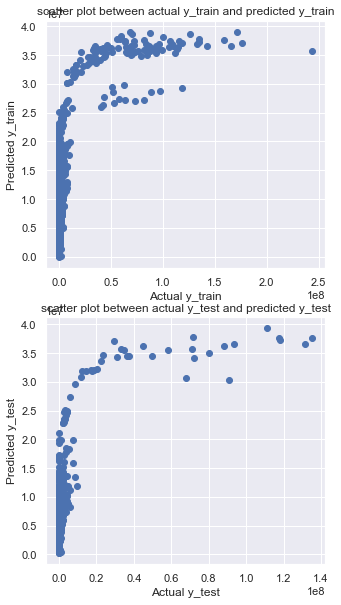

In [752]:
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(5,10))
ax1.scatter(y_train,y_train_lr_pred)
ax1.set_xlabel('Actual y_train')
ax1.set_ylabel('Predicted y_train')
ax1.set_title('scatter plot between actual y_train and predicted y_train')
ax2.scatter(y_test,y_test_lr_pred)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
plt.show()

In [753]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_lr_pred))
print('mse :',metrics.mean_squared_error(y_test, y_test_lr_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_lr_pred))
print('r2 :',metrics.r2_score(y_test, y_test_lr_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_lr_pred))*(len(X_test)-1)/(len(X_test)-13-1))

mae : 8618310.168501345
mse : 184007022241114.38
mape : 197.61564553580178
r2 : 0.35763692385190415
Adjusted r2 : 0.339483184743371
